# Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [7]:

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
#clf = LogisticRegression(random_state=0).fit(X, y)
# C:\Users\14088\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: 
# ConvergenceWarning: lbfgs failed to converge (status=1):
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
# lbfgs (Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm)
# Set max limit to 500 insteqd of 100 to prevent the warning message for no-converge.

clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=500).fit(X, y)
print('clf.predict(X[:2, :]):', clf.predict(X[:2, :]))
#(array([0, 0]))
print('clf.predict_proba(X[:2, :]):', clf.predict_proba(X[:2, :]))
#array([[9.8...e-01, 1.8...e-02, 1.4...e-08],
#       [9.7...e-01, 2.8...e-02, ...e-08]])
print('clf.score(X, y):', clf.score(X, y))

clf.predict(X[:2, :]): [0 0]
clf.predict_proba(X[:2, :]): [[9.81588489e-01 1.84114969e-02 1.45146963e-08]
 [9.71361183e-01 2.86387869e-02 3.02111899e-08]]
clf.score(X, y): 0.9733333333333334


# Logic Regression for Cross Validation
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV
X, y = load_iris(return_X_y=True)
#clf = LogisticRegressionCV(cv=5, random_state=0).fit(X, y)
clf = LogisticRegressionCV(random_state=0, solver='lbfgs', max_iter=500).fit(X, y)
clf.predict(X[:2, :])
#array([0, 0])
clf.predict_proba(X[:2, :]).shape
#(2, 3)
clf.score(X, y)
# 0.98...

0.98

# Many Examples from Scikit-learn:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Scroll to the bottom of the page, we can see many exmaples:

For example, feature discretization:

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html#sphx-glr-auto-examples-preprocessing-plot-discretization-classification-py

Automatically created module for IPython interactive environment

dataset 0
---------
LogisticRegression: 0.86
LinearSVC: 0.86
KBinsDiscretizer + LogisticRegression: 0.86
KBinsDiscretizer + LinearSVC: 0.92
GradientBoostingClassifier: 0.90
SVC: 0.94

dataset 1
---------
LogisticRegression: 0.40
LinearSVC: 0.40
KBinsDiscretizer + LogisticRegression: 0.88
KBinsDiscretizer + LinearSVC: 0.86
GradientBoostingClassifier: 0.80
SVC: 0.84

dataset 2
---------
LogisticRegression: 0.98
LinearSVC: 0.98
KBinsDiscretizer + LogisticRegression: 0.94
KBinsDiscretizer + LinearSVC: 0.94
GradientBoostingClassifier: 0.88
SVC: 0.98


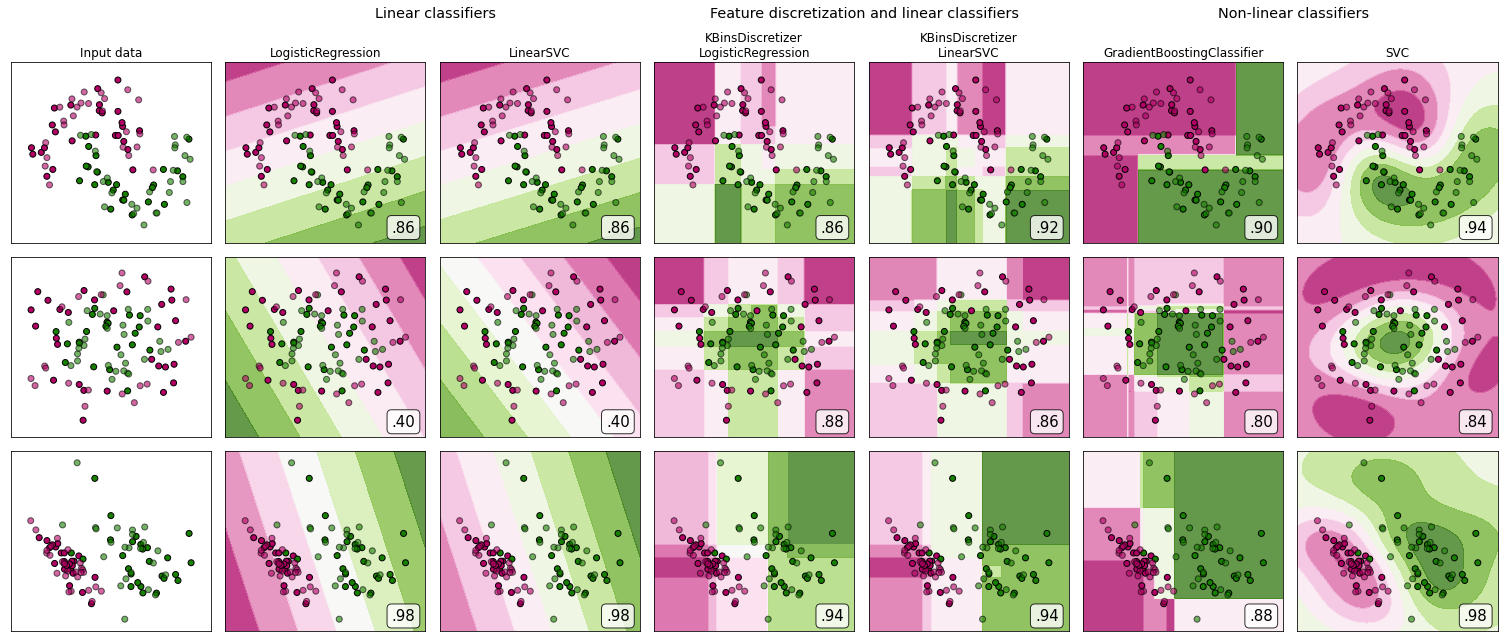

In [9]:
# Code source: Tom Dupré la Tour
# Adapted from plot_classifier_comparison by Gaël Varoquaux and Andreas Müller
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

print(__doc__)

h = .02  # step size in the mesh


def get_name(estimator):
    name = estimator.__class__.__name__
    if name == 'Pipeline':
        name = [get_name(est[1]) for est in estimator.steps]
        name = ' + '.join(name)
    return name


# list of (estimator, param_grid), where param_grid is used in GridSearchCV
classifiers = [
    (LogisticRegression(random_state=0), {
        'C': np.logspace(-2, 7, 10)
    }),
    (LinearSVC(random_state=0), {
        'C': np.logspace(-2, 7, 10)
    }),
    (make_pipeline(
        KBinsDiscretizer(encode='onehot'),
        LogisticRegression(random_state=0)), {
            'kbinsdiscretizer__n_bins': np.arange(2, 10),
            'logisticregression__C': np.logspace(-2, 7, 10),
        }),
    (make_pipeline(
        KBinsDiscretizer(encode='onehot'), LinearSVC(random_state=0)), {
            'kbinsdiscretizer__n_bins': np.arange(2, 10),
            'linearsvc__C': np.logspace(-2, 7, 10),
        }),
    (GradientBoostingClassifier(n_estimators=50, random_state=0), {
        'learning_rate': np.logspace(-4, 0, 10)
    }),
    (SVC(random_state=0), {
        'C': np.logspace(-2, 7, 10)
    }),
]

names = [get_name(e) for e, g in classifiers]

n_samples = 100
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_classification(n_samples=n_samples, n_features=2, n_redundant=0,
                        n_informative=2, random_state=2,
                        n_clusters_per_class=1)
]

fig, axes = plt.subplots(nrows=len(datasets), ncols=len(classifiers) + 1,
                         figsize=(21, 9))

cm = plt.cm.PiYG
cm_bright = ListedColormap(['#b30065', '#178000'])

# iterate over datasets
for ds_cnt, (X, y) in enumerate(datasets):
    print('\ndataset %d\n---------' % ds_cnt)

    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=.5, random_state=42)

    # create the grid for background colors
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # plot the dataset first
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    # plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    # iterate over classifiers
    for est_idx, (name, (estimator, param_grid)) in \
            enumerate(zip(names, classifiers)):
        ax = axes[ds_cnt, est_idx + 1]

        clf = GridSearchCV(estimator=estimator, param_grid=param_grid)
        with ignore_warnings(category=ConvergenceWarning):
            clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print('%s: %.2f' % (name, score))

        # plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]*[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_cnt == 0:
            ax.set_title(name.replace(' + ', '\n'))
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0'), size=15,
                bbox=dict(boxstyle='round', alpha=0.8, facecolor='white'),
                transform=ax.transAxes, horizontalalignment='right')


plt.tight_layout()

# Add suptitles above the figure
plt.subplots_adjust(top=0.90)
suptitles = [
    'Linear classifiers',
    'Feature discretization and linear classifiers',
    'Non-linear classifiers',
]
for i, suptitle in zip([1, 3, 5], suptitles):
    ax = axes[0, i]
    ax.text(1.05, 1.25, suptitle, transform=ax.transAxes,
            horizontalalignment='center', size='x-large')
plt.show()